## 自回归移动平均模型（ARIMA）
### 引言
    自回归移动平均模型（ARIMA）是一种常用于时间序列分析和预测的统计模型。它包括了自回归（AR）和移动平均（MA）两个组成部分，并结合了差分（Integrated）操作。在本文中，我们将探讨ARIMA模型的公式及其含义，以帮助读者更好地理解这一重要的时间序列模型。
### ARIMA模型的基本概念
ARIMA模型的名称反映了其三个主要组成部分：

**自回归（AR，Autoregressive）**： 表示当前观测值与过去一系列观测值之间存在线性关系。自回归阶数（p）定义了模型中考虑的过去观测值的数量。

**差分（I，Integrated）**： 表示对时间序列进行差分操作，即当前观测值与前一观测值之差。差分阶数（d）表示进行了多少次差分操作，以使时间序列变得平稳。

**移动平均（MA，Moving Average）**： 表示当前观测值与过去一系列观测值的白噪声误差之间存在线性关系。移动平均阶数（q）定义了模型中考虑的白噪声误差的数量。

**ARIMA模型的一般表示为ARIMA(p, d, q)**
### ARIMA模型公式
### 1 AR部分 
    自回归部分公式表示部分 
$$X_t = c + ∅_1X_{t-1}+∅_2X_{t-2}+...+∅_pX_{t-p}+ϵ_t$$

**其中**
* $X_t$ 是时间序列在时刻 (t) 的观测值
* c 是常数项。
* $∅_1,∅_2,,,∅_p$是自回归系数，表示当前观测值与过去 (p) 个观测值之间的权重
* $ϵ_t$是自回归系数，表示当前观测值与过去 (p) 个观测值之间的权重

### 2 I部分
查分部分的公式表示为：
$$Y_t = ▽^dX_t$$
其中
* $▽^d$ 表示d次差分操作

### 3 MA部分
移动平均部分的公式表示为：
$$ X_t = μ +θ_1ϵ_{t-1}+θ_2ϵ_{t-2}+...+θ_qϵ_{t-q}+ϵ_t$$
其中
* μ是均值项
* $θ_1,θ_2,....,θ_q$是移动平均系数，表示当前观察值与过去q个白噪声误差之间的权重

### 4 组合
将AR,I和MA三部结合起来，得到完成的ARIMA模型
$$Y_t = c + ∅_1Y_{t-1}+∅_2Y_{t-2}+...+∅_pY_{t-p}+▽^dX_t+μ +θ_1ϵ_{t-1}+θ_2ϵ_{t-2}+...+θ_qϵ_{t-q}+ϵ_t$$

* AR(p)的公式可以表示为：($X_t = \phi_1X_{t-1} + \phi_2X_{t-2} + \ldots + \phi_pX_{t-p} + \alpha_t$)，其中($\phi_1, \ldots, \phi_p$)是自回归系数，($\alpha_t$)是误差项。
* MA(q)的公式可以表示为：($X_t = \alpha_t - \theta_1\alpha_{t-1} - \ldots - \theta_q\alpha_{t-q}$)，其中($\theta_1, \ldots, \theta_q$)是移动平均系数，($\alpha_t$)同样是误差项。
* I(d)表示对原序列进行d次差分操作，即($X_t' = (1 - B)^dX_t$)，其中B是后移算子，($X_t'$)是经过d次差分后的序列。
* ARIMA(p, d, q)的模型公式结合了上述三个部分，但在实际操作中，通常是在差分后的序列上应用AR(p)和MA(q)模型。因此，综合公式可以表示为（在差分后的序列上）：$$X_t' = \phi_1X_{t-1}' + \phi_2X_{t-2}' + \ldots + \phi_pX_{t-p}' + \alpha_t - \theta_1\alpha_{t-1} - \ldots - \theta_q\alpha_{t-q}$$

### 展示数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 步骤1：导入必要的库

# 步骤2：加载时间序列数据
# 示例数据
data_pm=pd.read_csv('data/bill_2024.csv')
data = data_pm[0:1000]
data
# date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
# data = pd.DataFrame(date_rng, columns=['date'])
# 随机一个正态分布的数据
#data['value'] = np.random.randn(len(date_rng))





,date,value
0,2024-01-01,65973
1,2024-01-02,25399
2,2024-01-03,20941
3,2024-01-04,41038
4,2024-01-05,41557
...,...,...
151,2024-05-31,122187
152,2024-06-01,69518
153,2024-06-02,17052
154,2024-06-03,52077


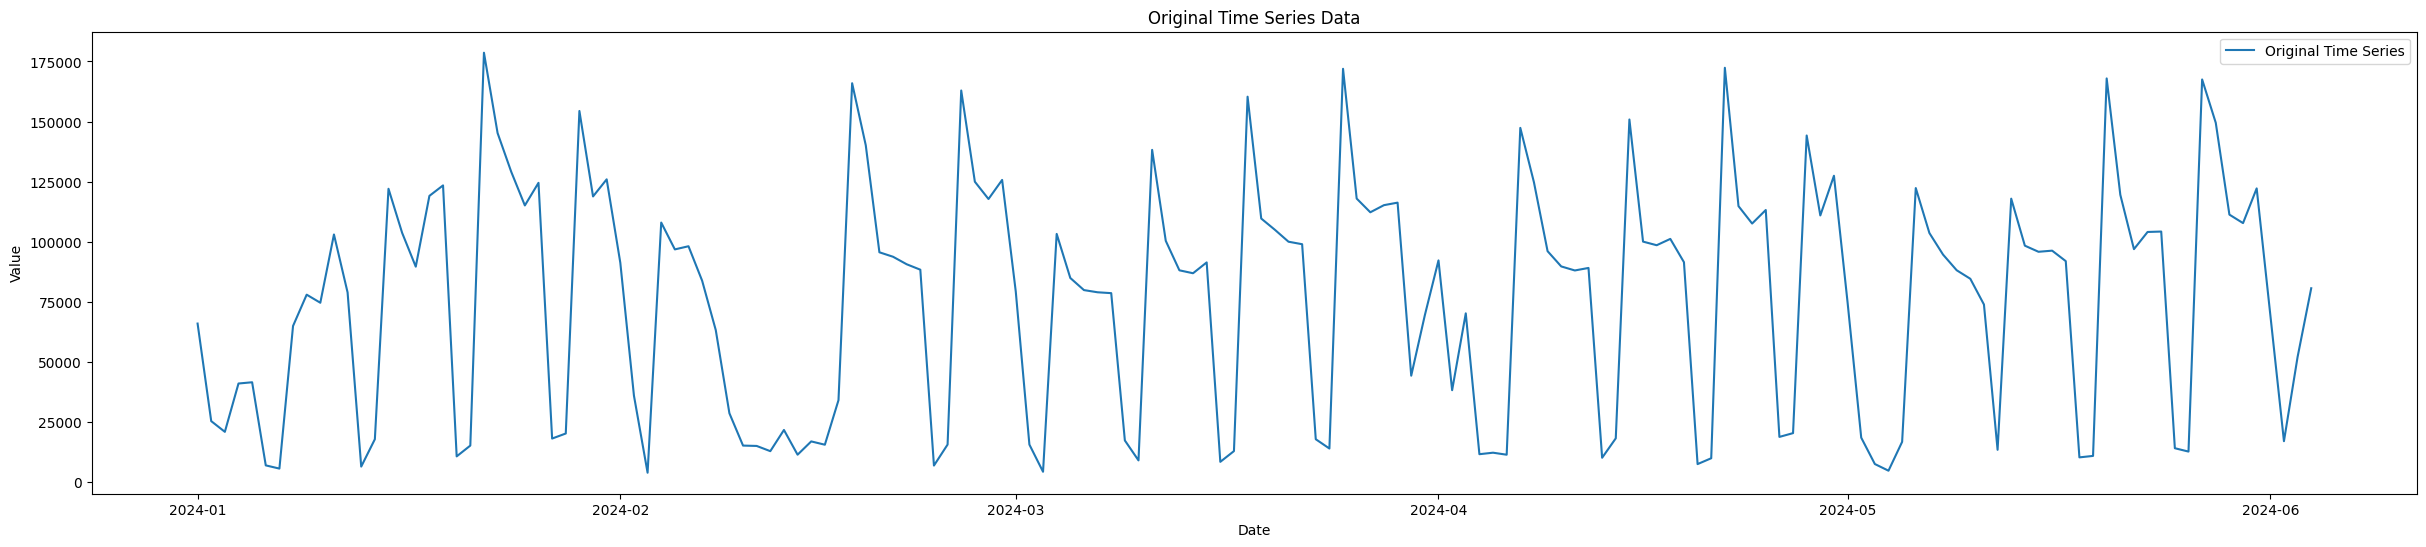

In [2]:
# 步骤3：可视化原始时间序列
plt.figure(figsize=(30, 6))
plt.plot(pd.DatetimeIndex(pd.to_datetime(data['date'])), data['value'], label='Original Time Series')
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

### 进行差分操作并绘制ACF图
### 差分
差分是一种用于序列的数学运算，对一个序列进行差分运算，即是计算该序列中的不同观测值之间的差异。举例说明，假设现在有序列X:
$$X = [5,4,6,7,9,12]$$
如果让该序列中执行4-5、6-4、7-6、9-7、12-9五组运算，即后一位数减前一位数，形成新的序列X’，则有
$$ X' = [−1,2,1,2,3] $$

则序列X’就是序列X的一阶差分结果(First-Order Differencing)
在实际进行差分运算时，我们可以改变差分运算的两个相关因子来执行不同的差分：**一个是差分的阶数（order），另一个是差分的滞后（lag）。**

### Order：差分的阶数
高阶差分意味着多次执行一阶差分。例如，当对$X[5, 4, 6, 7, 9, 12]$进行二阶差分时（Second-Order Differencing），**实际上是需要对X进行两次一阶差分**，即先求解出X’，再在X’的基础上进行一阶差分，求解出X’‘：
$$X'=[−1,2,1,2,3]$$
$$X''=[3,−1,1,1]$$

### 差分的滞后
差分的滞后（lag）与差分的阶数完全不同。正常的一阶差分是滞后为1的差分（lag-1 Differences），这代表在差分运算中，让相邻的两个观测值相减，即让间隔为（lag-1）的两个观测值相减。因此，当滞后为2时，则代表需要让相隔1个值的两个观测值相减。举例说明：
$$X=[5,4,6,7,9,12]$$
假设现在我们对序列X执行滞后2差分（lag-2 Differences），求得X_lag_2，则是在该序列中执行6-5、7-4、9-6、12-7的运算，最终我们得到的序列是：
$$X_lag2 =[1,3,3,5] $$

### 滞后运算/滞后算子/延迟算子
滞后（lag）这一概念是差分运算中的关键概念，但事实上，独立于差分运算之外，滞后也是统计学中重要的运算形式之一。在统计学中，滞后运算是“向后移动一个单位”的运算，当用于时间序列时，它特指“向过去移动一个时间单位”的运算。大部分时候，滞后运算被简写为字母B（Backshift）或者字母L（Lag），我们可以对单一的时序样本或整个时间序列做滞后运算。举例说明，对于一个时间点上的标签值，有：
$$By_t = y_{t-1}$$
并且：
$$B(By_t)=B^2y_t=y_{t-2}$$

对整个时间序列有：
$$t_s = [y_{t-2},y_{t-1},y_t,y_{t+1},y_{t+2}]$$
$$Bt_s = [y_{t-3},y_{t-2},y_{t-1},y_t,y_{t+1}]$$

因此滞后运算可以被用来表现差分。其中，多步差分的表现方式很简单，一步差分是相邻的标签值之间相减，因此有1-lag difference：
$$1\_lag\_y = y t − y_{t − 1} = y_t − B y_t = ( 1 − B ) y_t$$

12步差分是相隔11个标签值进行相减，因此有12-lag difference：
$$12\_lag\_y = y_t - y_{t-12} = (1-B^{12})y_t$$
因此n步差分就可以表示为：
$$n\_lag\_y = (1-B^n)y_t$$

------

与之相对的，高阶差分也可以用滞后运算表示。假设现在有时序数据
$$[y_{t-2},y_{t-1},y_t,y_{t+1},y_{t+2}]$$
整个序列的一阶差分为：
$$[y_{t-1}-y_{t-2},y_t-y_{t-1},y_{t+1}-y_t,y_{t+2}-y_{t+1}$$
一阶差分就等同于一步差分，因此有first-order difference
$$y' = y_t - y_{t-1} = y_t-By_t = (1-B)y_t$$
在此基础上，二阶差分可以被表示为second-order difference：

<center> <img src='pic/2d.png' width=500 > </center>
以此类推，d阶差分可以被表示为：
$$d\_order\_y = (1-B)^ny_t$$


### ACF与PACF
**ARIMA模型中的三个参数：p和q分别控制ARIMA模型中自回归和移动平均的部分，而d则控制输入ARIMA模型的数据被执行的差分的阶数。**
|参数设置|ARIMA模型的实际情况
|:----:|:----|
|ARIMA(p,0,0)|ARIMA等同于自回归模型AR
|ARIMA(0,0,q)|ARIMA等同于移动平均模型MA
|ARIMA(0,0,0)|不建模，输出等于白噪声$\epsilon_{t}$或等于白噪声向上或向下平移$\beta_{0}$
|ARIMA(0,1,0)|且不设置常数项$\beta_{0}$在白噪声基础上进行了差分处理 输出的结果等同于“随机漫步”


通过调控ARIMA模型中的超参数，可以实现不同的模型，那具体如何确定p、q、d等参数的值就需要使用**自相关系数ACF**（Auto-correlation function）和**偏自相关系数PACF**（Partial Auto-Correlation Function）了。自相关系数**ACF**衡量当前时间点上的观测值与任意历史时间点的观测值之间的**相关性大小**，而偏自相关系数**PACF**衡量当前时间点上的观测值与任意历史时间点的观测值之间的**直接相关性的大小**。在该定义中，有几个关键的问题需要解释

#### 什么是直接相关性？PACF和ACF有什么不同？
来看下面的时间序列：
$$t_s = [y_{t-2},y_{t-1},y_t]$$
    时间序列的基本原则之一是“过去影响未来”，那$y_{t-2}$的值是如何影响了$y_{t-1}$的值的呢？有多种可能：例如，$y_{t-2}$的值直接影响了$y_{t}$的值（比如，双11当天的销量直接冲击了双11两天后的销量），也有可能$y_{t-2}$影响了$y_{t-1}$再由$y_{t-1}$将这种影响传递给$y_{t}$（比如，前天的降雨量影响了昨天的降雨量，昨天的降雨量又影响今天的降雨量），还有可能两种影响都发生了，又或许$y_{t-2}$与$y_{t}$之间根本没有互相影响。在这些多种的影响方式中，$y_{t-2}$直接对$y_{t}$产生的影响越大，$y_{t-2}$和$y_{t}$之间的直接相关性越强。
   当我们在计算ACF时，我们计算的是多种影响方式带来的“综合效应”，即ACF并不关心两个观测点之间是以什么方式相关，只关心两个观测点之间的相关程度。但PACF只关心“直接相关”的相关程度，并不关心两个观测点之间多种的、其他类型的可能的链接。因此，在求解PACF的时候，我们需要将“不直接”的相关性从ACF的值中“剔除”

#### 如何定义两个时间点之间的时间差？
 在ACF和PACF的定义中，两个时间点之间的时间差可以用滞后进行衡量。比如，计算当前时间点上的观测值$y_{t}$与$y_{t-1}$之间的ACF，这样的ACF是滞后为1的ACF。如果对一个时间序列𝑡𝑠执行滞后运算，并让滞后为1的1_lag_𝑡𝑠与原始序列𝑡𝑠中的元素一一对应计算ACF，就可以一次性得出整个时间序列的滞后为1的ACF

在实际使用这两种相关性时，我们几乎总是计算时间序列与其滞后序列之间的相关性，所以 **ACF和PACF值一般都是针对某一序列、在某一程度的滞后lag下计算出来的，不同的滞后lag得出的ACF/PACF值不同。** 当𝑡𝑠与其滞后序列k_lag_𝑡𝑠的ACF相关时，这种相关的本质其实是序列𝑡𝑠上任意时间点𝑡的观测值与(𝑡−𝑘)处的观测值相关。

#### 如何理解ACF和PACF值？
与皮尔逊相关系数高度类似，ACF和PACF的取值范围都是[-1,1]，其中1代表两个序列完全正相关，-1代表两个序列完全负相关，0代表两个序列不相关。通常在实际使用时，我们会依赖于代码/统计工具直接计算出不同序列的ACF和PACF值并绘制图像，再通过图像本身的表现来进行模型的选择。如下是常见的ACF（图左）和PACF（图右）的图像
<center><img src='pic/acf_pacf01.png' width=800></center>

ACF图和PACF图的横坐标相同，都是不同的滞后程度，而纵坐标是当前滞后程度下序列的ACF和PACF值。背景为蓝色的区域代表着95%或99%的置信区间，当ACF/PACF值在蓝色区域之外时，我们就认为当前滞后程度下的ACF/PACF是统计上显著的值，即这个滞后程度下的序列之间的相关性很大程度上是信任的、不是巧合。当滞后为0时，ACF和PACF值必然为1，因为一个序列与自己始终完全相关，因此ACF和PACF图上有意义的值是从滞后为1的值开始看。
<center><img src='pic/acf_pacf02.png' width=800></center>
 当图像呈现规律衰减的拖尾状态时，说明此时原始序列中的样本严格遵循着“久远的历史对未来的影响更弱，更近的历史对未来的影响更强”的基本常识，像这样的时间序列一定是可以用较为简单的模型进行建模的。需要注意的是，下面的情况也都属于“规律衰减的拖尾”：
<center><img src='pic/acf_pacf03.png' width=800></center>

 当图像呈现截尾状况的时候，一般截尾的阶数都很低（一般最多不会超过3），这说明该序列中只有非常少的日子对未来有影响。当图像不截尾时，则说明原始数据中的规律较难提取，原始数据可能是平稳序列，可能是白噪音，需要更复杂的时间序列模型来进行规律的提取。



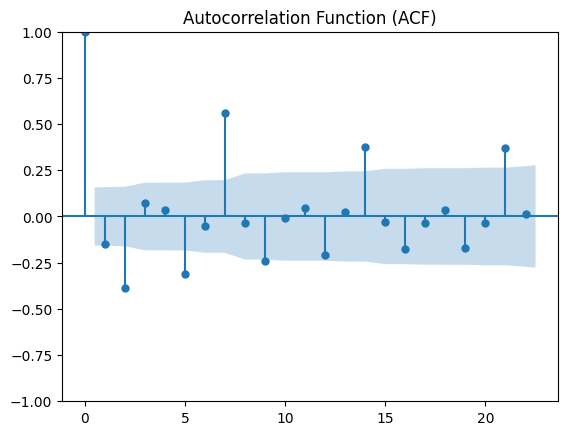

In [5]:
# 步骤4：差分操作，使序列平稳
differenced_data = data['value'].diff(-1).dropna()
# 步骤5：确定ARIMA模型的阶数
# 绘制ACF图
plot_acf(differenced_data)
plt.title('Autocorrelation Function (ACF)')
plt.show()


### 绘制PACF图

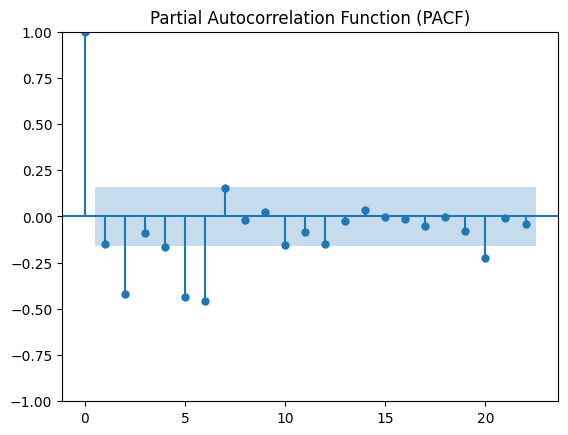

In [6]:


# 绘制PACF图
plot_pacf(differenced_data)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



#### 超参数p、q、d的确定
**对ARIMA模型来说，确定p和q的值有两层含义**

* 确定要使用的具体模型是AR，MA还是ARIMA？（即，p和q中任意一个值为0吗？）

* 如果是AR模型，p的值是多少？如果是MA模型，q的值是多少？如果是ARIMA模型，p和q分别是多少？

在统计学中，首先要绘制ACF和PACF图像来回答第一个问题。**对任意时间序列，当ACF图像呈现拖尾、且PACF图像呈现截尾状态时，当前时间序列适用AR模型，且PACF截尾的滞后阶数就是超参数p的理想值（如下图所示，p=1）**

<center><img src='pic/acf_pacf04.png' width=800></center>

<div style="background-color: #e0e0e0;">
$$y_t = β_0 + β_1y_{t-1}+β_2y_{t-2} + ....+ β_py_{t-p} +ϵ_t$$
对AR模型，ACF的值对应了$y_{t-1}$对$y_{t}$的影响，PACF的显著性对应了𝛽的显著性
</div>



对任意时间序列，**当PACF图像呈现拖尾、且ACF图像呈现截尾状态时，当前时间序列适用MA模型，且ACF截尾的滞后阶数就是超参数q的理想值**如下图所示
<center><img src='pic/acf_pacf05.png' width=800></center>
<div style="background-color: #e0e0e0;">
$$y_t = β_0 + ϵ_t +θ_1ϵ_{t-1}+θ_2ϵ_{t-2}+...+θ_qϵ_{t-q}$$
对MA模型，ACF的显著性对应了𝜃的显著性，PACF的值对应了$\epsilon_{t-1}$对$\epsilon_{t}$的影响
</div>

对任意时间序列，**当ACF图像和PACF图像都呈现不呈现拖尾状态时，无论图像是否截尾，时间序列都适用于ARIMA模型**，且此时ACF和PACF图像无法帮助我们确定p和q的具体值，但能确认p和q一定都不为0。

<center><img src='pic/acf_pacf06.png' width=800></center>

**当确定使用AR模型时，用PACF决定p值。当确定使用MA模型时，用ACF决定q值**。当确定使用ARIMA模型时，ACF和PACF是失效的，并无作用。那么当确定要使用ARIMA模型时，我们应当如何决定p和q的值呢？虽然现在统计学领域有许多理论来帮助p和q定阶，但目前实践中最好的方法依然是傻瓜式尝试。在ARIMA模型当中，p和q的值往往取值不高，一般是[1,5]以内的正整数，因此实践中更常用的方法是从最小值p=1、q=1的方式开始进行尝试，不断改变p和q的取值，直到模型通过检验或达到我们需要的精度要求。一旦确定模型是ARIMA之后，还需要确定参数d的取值。在统计学中并没有严谨的方法论告诉我们应该如何选择参数d，但在数据被输入ARIMA之前、该数据应该已经经过了多步差分、满足了平稳性条件。因此ARIMA模型中的d是锦上添花、可以帮助我们使用复合的差分运算来提升模型精度，但不是绝对的必须项。因此d可以为0，在不为0的时候，d也是1、2、3这样较小的阶数

在选择参数d时，往往从1、2、3阶中选择方差最小、差分后数据噪音程度较低的阶数，尽量避免过差分。我们也可以对进行差分后的数据绘制ACF图像，如果滞后为1时ACF为负数（如下图），那大概率说明此时的高阶差分会导致过差分。

<center><img src='pic/acf_01.png' width=800></center>



In [7]:
# 步骤6：拟合ARIMA模型
p, d, q = 1, 1, 1  # 根据ACF和PACF的结果设置p和q的值
arima_model = ARIMA(data['value'], order=(p, d, q))
arima_result = arima_model.fit()

# 步骤7：模型诊断
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  156
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1892.137
Date:                Thu, 06 Jun 2024   AIC                           3790.274
Time:                        16:21:01   BIC                           3799.404
Sample:                             0   HQIC                          3793.983
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3364      0.105      3.218      0.001       0.132       0.541
ma.L1         -0.9883      0.070    -14.064      0.000      -1.126      -0.851
sigma2      3.094e+09   1.84e-11   1.68e+20      0.0

### 模型参数:

* Dep. Variable: value，表示因变量是“value”。
* No. Observations: 156，表示观测值的数量为156。
* Model: ARIMA(1, 1, 1)，表示模型是一个一阶自回归（AR），一阶差分（I），一阶移动平均（MA）模型。
### 模型拟合度:
* Log Likelihood: -1892.137，表示对数似然函数的值。
* AIC: 3790.274，赤池信息量准则，用于模型选择，越小表示模型拟合度越好。
* BIC: 3799.404，贝叶斯信息量准则，同样是越小表示模型拟合度越好。
* HQIC: 3793.983，汉纳-奎恩信息量准则。
### 系数估计:
* ar L1: 0.3364，自回归系数，表示时间序列过去值对当前值的影响。
* ma L1: -0.9883，移动平均系数，表示过去误差项对当前值的影响。
* sigma2: 3.094e+09，模型的方差。
### 统计检验:
* Ljung-Box (L1) (Q): 0.99，用于检验残差序列的随机性，接近1表示残差是随机的。
* Jarque-Bera (JB): 8.03，用于检验残差序列的正态性，较小的P值表示残差不服从正态分布。
* Prob(Q): 0.32，Ljung-Box Q统计量的P值。
* Prob(JB): 0.02，Jarque-Bera统计量的P值。
### 异方差性检验:
* Heteroskedasticity (H): 1.13，用于检验残差的异方差性。
* Skew: 0.55，残差的偏度。
* Prob(H)(two-sided): 0.65，异方差性检验的P值。
* Kurtosis: 3.21，残差的峰度。
### 警告:
报告中提到了一个警告：[1] Covariance matrix calculated using the outer product of gradients (complex-step)，这表示协方差矩阵是通过梯度的外积计算得到的，这通常用于数值稳定性。
根据报告，模型的系数估计和统计检验结果表明模型在一定程度上拟合了数据，但是Jarque-Bera检验的P值为0.02，小于0.05，这可能表明残差序列不服从正态分布。这需要进一步的分析和可能的模型调整。

### 预测模型

In [8]:
forecast_steps = 100
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data['date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean
forecast_values 

156    78473.897324
157    77737.728591
158    77490.050816
159    77406.721712
160    77378.686337
           ...     
251    77364.471663
252    77364.471663
253    77364.471663
254    77364.471663
255    77364.471663
Name: predicted_mean, Length: 100, dtype: float64

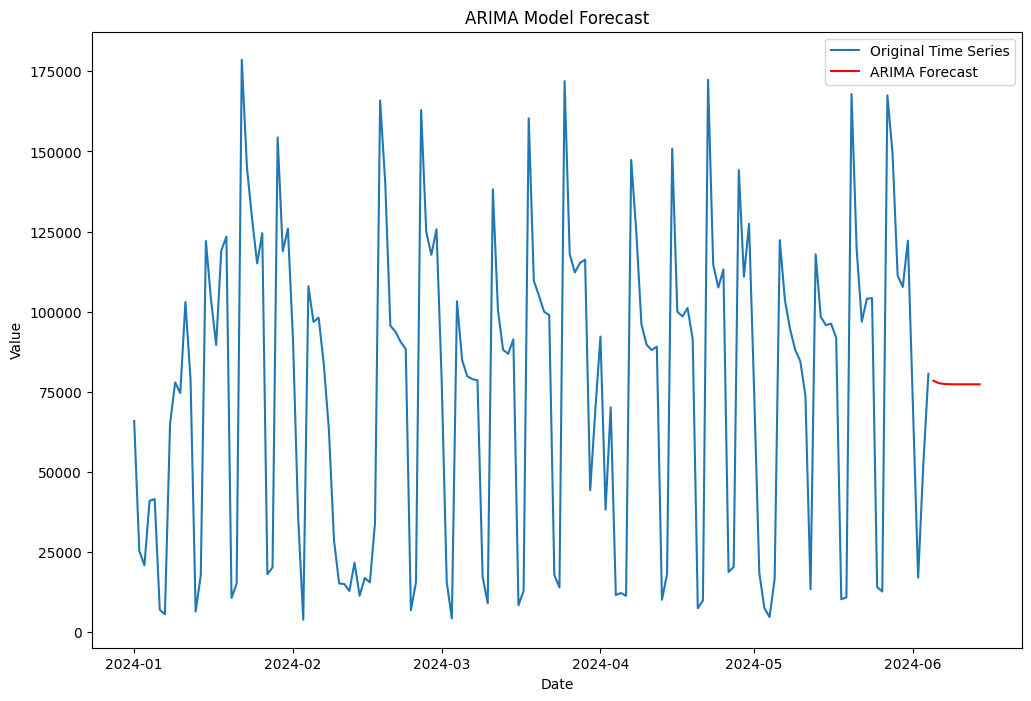

In [9]:

# 步骤8：模型预测
forecast_steps = 10
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data['date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean
#
# 绘制原始数据和预测结果
plt.figure(figsize=(12, 8))
plt.plot(pd.DatetimeIndex(pd.to_datetime(data['date'])), data['value'], label='Original Time Series')
plt.plot(forecast_index, forecast_values, color='red', label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()